In [3]:
import sys
import numpy as np

In [4]:
def replace_string_with_sum(data, column):
    
    characters = []
    # Get all the unique characters from the input string
    all_chars = set("".join(data[column].tolist()))

    # Add the missing characters to the characters list
    characters = list(set(characters + list(all_chars)))
    print(characters)

    char_map = {}
    for i, char in enumerate(characters):
        char_map[char] = i + 1
    print(char_map)

    # Replace the values in the input column with the sum of the values of each character in the string
    data[column] = data[column].map(lambda x: sum([char_map[c] for c in x]))
    return data

In [54]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


def tsne_plot(data):
    ncols = data.shape[1]
    feature = data.values[:,0:ncols-1]
    target = data.values[:,ncols-1]
    
    def fashion_scatter(x, colors):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.scatter(x[:,0], x[:,1], c=colors, cmap='rainbow')
        return fig, ax

    colors = target
    RS = 42
    tsne = TSNE(perplexity = 100)
    X_tsne = tsne.fit_transform(feature)

    fig, ax = fashion_scatter(X_tsne, colors)
    plt.show()
    

In [46]:
import umap
import matplotlib.pyplot as plt

def umap_plot(data):
    ncols = data.shape[1]
    feature = data.values[:,0:ncols-1]
    target = data.values[:,ncols-1]

    umap_model = umap.UMAP(n_neighbors=50,min_dist=0.1)
    embedding = umap_model.fit_transform(feature)

    plt.figure(figsize=(12, 12))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=target, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title('UMAP projection of the Digits dataset', fontsize=24)

In [34]:
from sklearn.decomposition import PCA


def PCA_plot(data):
    ncols = data.shape[1]
    feature = data.values[:,0:ncols-1]
    target = data.values[:,ncols-1]

    pca = PCA(n_components=2)
    pca.fit(feature)
    # This should equal the sum of the first two values in the cumulative proportion plot
    print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

    # Project data onto first two principal components
    projX = pca.transform(feature)
    plt.figure(4)

    plt.scatter(projX[:,0], projX[:,1], c=target)
    plt.show()


In [16]:
from src.preprocess.setup import config
from src.preprocess.feature_filter import load_data
from src.preprocess.label import generate_label
import src.preprocess.feature_filter

config.setConfig(config.speciesType.mouse, config.chainType.beta)
data = load_data()
generate_label(data, config.labelType.species)

fetching data stage
generating label


,cdr3_a_aa,v_a_gene,j_a_gene,cdr3_b_aa,v_b_gene,d.beta,j_b_gene,species,mhc.a,mhc.b,...,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score,label
1165,CAATGSFNKLTF,TRAV14D-2*01,NaN,CASGGQGRAEQFF,TRBV13-2*01,NaN,TRBJ2-1*01,MusMusculus,H-2Aa,H-2Aa,...,NaN,NaN,NaN,NaN,NaN,1d9k,"{""cdr3"": ""CAATGSFNKLTF"", ""cdr3_old"": ""CAATGSFN...","{""cdr3"": ""CASGGQGRAEQFF"", ""cdr3_old"": ""CASGGQG...",3,0
1166,CAMRGDYGGSGNKLIF,TRAV16*01,TRAJ32*01,CTCSADRVGNTLYF,TRBV1*01,NaN,TRBJ1-3*01,MusMusculus,H-2Kb,B2M,...,NaN,NaN,NaN,NaN,NaN,1fo0,"{""cdr3"": ""CAMRGDYGGSGNKLIF"", ""cdr3_old"": ""CAMR...","{""cdr3"": ""CTCSADRVGNTLYF"", ""cdr3_old"": ""CTCSAD...",3,1
1168,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,CASGGGGTLYF,TRBV13-2*01,NaN,TRBJ2-4*01,MusMusculus,H-2Kb,B2M,...,NaN,NaN,NaN,NaN,NaN,1g6r,"{""cdr3"": ""CAVSGFASALTF"", ""cdr3_old"": ""CAVSGFAS...","{""cdr3"": ""CASGGGGTLYF"", ""cdr3_old"": ""CASGGGGTL...",3,2
1170,CAARYQGGRALIF,TRAV14-1*01,TRAJ15*01,CTCSAAPDWGASAETLYF,TRBV1*01,NaN,TRBJ2-3*01,MusMusculus,H-2Kb,B2M,...,NaN,NaN,NaN,NaN,NaN,1kj2,"{""cdr3"": ""CAARYQGGRALIF"", ""cdr3_old"": ""CAARYQG...","{""cdr3"": ""CTCSAAPDWGASAETLYF"", ""cdr3_old"": ""CT...",3,1
1172,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,CASGGGGTLYF,TRBV13-2*01,NaN,TRBJ2-4*01,MusMusculus,H-2Kb,B2M,...,NaN,NaN,NaN,NaN,NaN,1mwa,"{""cdr3"": ""CAVSGFASALTF"", ""cdr3_old"": ""CAVSGFAS...","{""cdr3"": ""CASGGGGTLYF"", ""cdr3_old"": ""CASGGGGTL...",3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60046,NaN,NaN,NaN,CASSHWGGGYAEQFF,TRBV13-3*01,NaN,TRBJ2-1*01,MusMusculus,H-2Db,B2M,...,NaN,NaN,NaN,H2d/b,NaN,NaN,NaN,"{""cdr3"": ""CASSHWGGGYAEQFF"", ""cdr3_old"": ""CASSH...",0,9
60047,NaN,NaN,NaN,CASSDWGQGSDYTF,TRBV13-3*01,NaN,TRBJ1-2*01,MusMusculus,H-2Db,B2M,...,NaN,NaN,NaN,H2d/b,NaN,NaN,NaN,"{""cdr3"": ""CASSDWGQGSDYTF"", ""cdr3_old"": ""CASSDW...",0,9
60048,NaN,NaN,NaN,CASSDFKQDTQYF,TRBV13-3*01,NaN,TRBJ2-5*01,MusMusculus,H-2Db,B2M,...,NaN,NaN,NaN,H2d/b,NaN,NaN,NaN,"{""cdr3"": ""CASSDFKQDTQYF"", ""cdr3_old"": ""CASSDFK...",0,9
60049,NaN,NaN,NaN,CASSDYRVAEQFF,TRBV13-3*01,NaN,TRBJ2-1*01,MusMusculus,H-2Db,B2M,...,NaN,NaN,NaN,H2d/b,NaN,NaN,NaN,"{""cdr3"": ""CASSDYRVAEQFF"", ""cdr3_old"": ""CASSDYR...",0,9


In [23]:
data = data[['cdr3_b_aa', 'v_b_gene', 'j_b_gene', 'label']]
print(data)
print(data['label'].unique())

       cdr3_b_aa  v_b_gene  j_b_gene  label
1165         120        70        65      0
1166         118        56        60      1
1168         101        70        73      2
1170         225        56        66      1
1172         101        70        73      1
...          ...       ...       ...    ...
60046        163        65        65      9
60047        160        65        65      9
60048        130        65        74      9
60049        140        65        65      9
60050        173        65        66      9

[3004 rows x 4 columns]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [18]:
data = replace_string_with_sum(data, 'cdr3_b_aa')
data = replace_string_with_sum(data, 'v_b_gene')
data = replace_string_with_sum(data, 'j_b_gene')
print(data)

['N', 'C', 'R', 'Q', 'Y', 'F', 'T', 'M', 'G', 'L', 'H', 'K', 'E', 'V', 'S', 'I', 'D', 'P', 'W', 'A']
{'N': 1, 'C': 2, 'R': 3, 'Q': 4, 'Y': 5, 'F': 6, 'T': 7, 'M': 8, 'G': 9, 'L': 10, 'H': 11, 'K': 12, 'E': 13, 'V': 14, 'S': 15, 'I': 16, 'D': 17, 'P': 18, 'W': 19, 'A': 20}
['-', '7', '1', '3', '0', 'V', 'B', 'T', '2', 'R', '4', '6', '5', '*', '9']
{'-': 1, '7': 2, '1': 3, '3': 4, '0': 5, 'V': 6, 'B': 7, 'T': 8, '2': 9, 'R': 10, '4': 11, '6': 12, '5': 13, '*': 14, '9': 15}
['-', '7', '1', '3', '0', 'J', 'B', 'T', '2', 'R', '4', '5', '*']
{'-': 1, '7': 2, '1': 3, '3': 4, '0': 5, 'J': 6, 'B': 7, 'T': 8, '2': 9, 'R': 10, '4': 11, '5': 12, '*': 13}
       cdr3_b_aa  v_b_gene  j_b_gene  label
1165         120        70        65      0
1166         118        56        60      1
1168         101        70        73      2
1170         225        56        66      1
1172         101        70        73      1
...          ...       ...       ...    ...
60046        163        65        65     

/var/folders/w2/bzpwnzzd1xq4bywkn49tjtjw0000gn/T/ipykernel_58596/601369500.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].map(lambda x: sum([char_map[c] for c in x]))


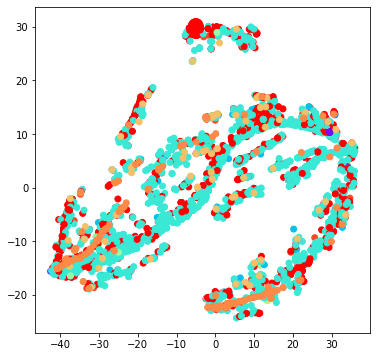

In [55]:
tsne_plot(data)

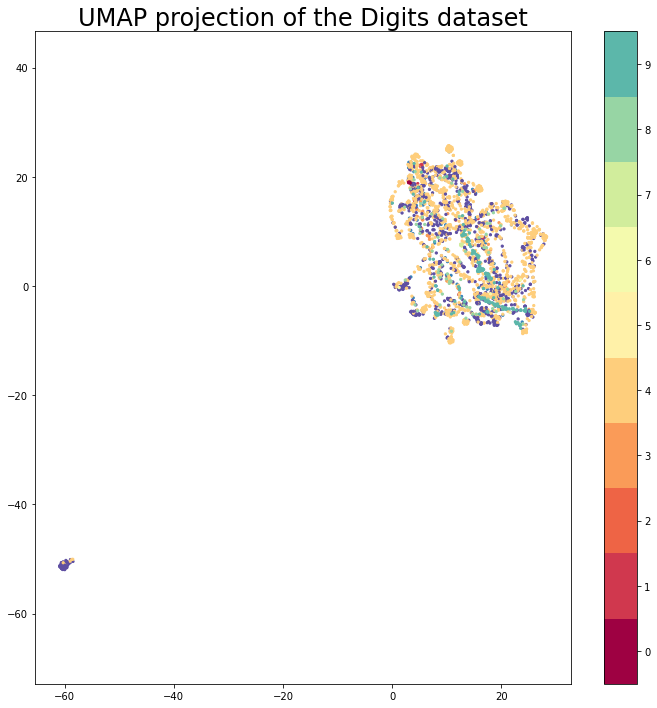

In [56]:
umap_plot(data)

Explained variance ratio [0.87900541 0.07804116]


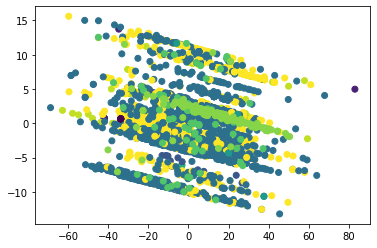

In [35]:
PCA_plot(data)